# ARMA Transform
In this example we will be taking a wind speed file and putting it into the Raven ARMA transform. ARMA (or Autoregressive Moving Average) provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression (AR) and the second for the moving average (MA). This provides Raven with additional tools to characterize signals and generate predictions. The ARMA is also used in conjuction with the fourier transform in Raven which provides a further layer of characterization and generation. Raven is intended to be very thourough in being able to identify correct signals and ARMA is an excellent tool to add for this purpose.

# Arma Algorithm
The ARMA Algorithm is made up of two parts the Auto Regression formula and the Moving Average Formula. These Algorithms can be seen below.

This is an example of the Auto Regression Formula.

$ X_{t} = c + \sum \limits_{i=1} ^{p} \phi_{i-i} + \epsilon_{t} $

This is an example of the Moving Average Formula.

$ X_{t} = \mu + \epsilon_{t} + \sum \limits_{i=1} ^{q} \omicron_{i} \epsilon_{t-i} $

The ARMA Formula is a combination of these two Formulas and can bee seen below:

$ X_{t} = c + \epsilon_{t} + \sum \limits_{i=1} ^{p} \phi_{i}X_{t-i} + \sum \limits_{i=1} ^{q} \omicron_{i} \epsilon_{t-i} $

# ARMA in Raven
Within Raven There are three inputs for the ARMA Algorithm: SignalLag, NoiseLag, and reduce_memory. Specifically SignalLag and NoiseLag fit the prediction to the input data. The ARMA model is constructed in the ARMA.py file in the TSA folder. Below we can see an implementation of the ARMA model. This is how one can filter the data needed fro Raven input and the graph Raven's output. For this example we are using a dataset of wind speed and power output from wind turbines.

In [1]:
%%capture
#Import the needed libraries, warnings is simply imported to remove warnings from the output.
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# OriginalDataset
Here we are reading the original dataset of wind speeds and power outputs.

In [2]:
#This is the original dataset being read, we will use this data to characterize and generate a prediction.
data = pd.read_csv("raw_data/OriginalDataset.csv")

In [3]:
#This is meant to filter the data to two columns Active Power, and Wind Speed.
dataLatest = data[['LV ActivePower (kW)','Wind Speed (m/s)']]

# Wind Input
Here we are writing the refined data from the original dataset to the input file that we will directly input into Raven. The two columns that we will input into Raven are power output and wind speed. This is due to the fact that ARMA requires two inputs. In the case of signals being retrieved from a reactor more relevant data can be selected. For this demonstration we will just focus specifically on the wind speed. 

In [4]:
#This further filters the data to just 145 lines in the dataset. After filtering further it then 
#writes to a new dataset that we will input into Raven.
df = dataLatest.iloc[0:144]
df['Wind Speed (m/s)'] = df['Wind Speed (m/s)'].diff()
df.to_csv('raw_data/WindInput.csv')


In [5]:
#import matplotlib to graph the results.
import matplotlib.pyplot as plt

# Wind Output
Here we read the output of Raven. The graph only contains the output from the wind speeds. As we can see the actual data represented in red is closely mirrored by Raven's predictions graphed in blue. Another important note is to make sure that the original data is flattened otherwise Raven will make a prediction that fits poorly.

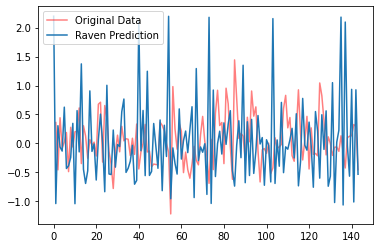

In [7]:
#Take the output from Raven and graph it next to the original data.
y = df['Wind Speed (m/s)']

dat = pd.read_csv('raw_data/Output.csv')


plt.plot(dat.seconds, y, '-', alpha=0.5, color='red', label="Original Data")
plt.plot(dat.seconds, dat.signal1, label='Raven Prediction')
plt.legend(loc='upper left')
plt.show()